### Sobre a Biblioteca

- Seaborn é uma biblioteca de visualização estatística de dados
- Possui excelentes estilos padrões
- Foi projetada para funcionar em harmonia com objetos do tipo Dataframe do Pandas

### Plots de Distribuições

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


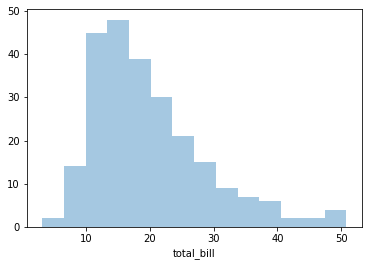

In [13]:
# plotar distribuição
sns.distplot(tips['total_bill'], kde=False)

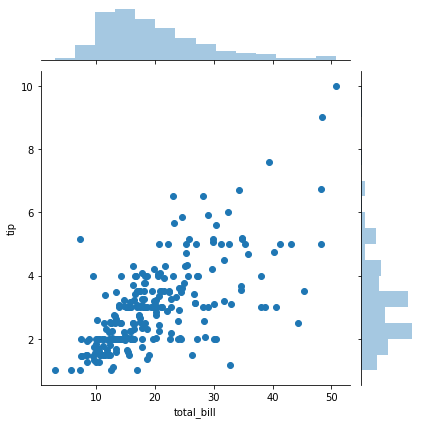

In [16]:
# plotar distribuição conjunta
sns.jointplot(x='total_bill', y='tip', data=tips)

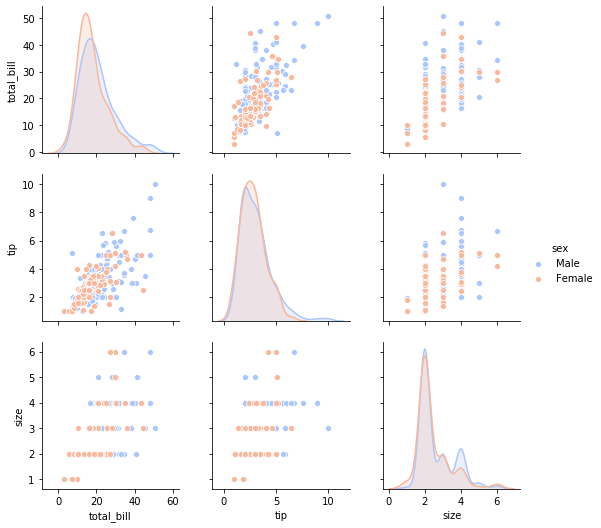

In [19]:
# jointplot de cada variavel numerica
sns.pairplot(tips, hue='sex', palette='coolwarm')

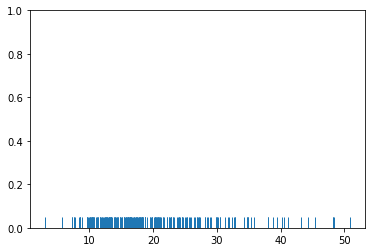

In [22]:
# rugplot eh usado pra criar o KDE
sns.rugplot(tips['total_bill'])

(0, 1)

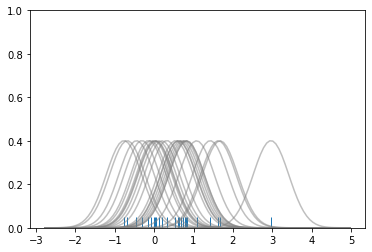

In [23]:
# pra quando nao sabe o tipo de distribuicao

# Não se preocupe em entender este código!
# É apenas para o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

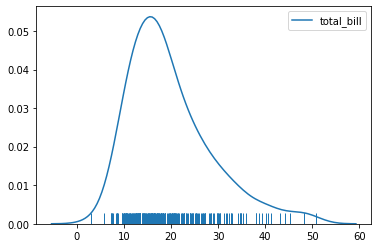

In [24]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

### Plots Categóricos

In [5]:
import seaborn as sns
import numpy as np

In [6]:
%matplotlib inline

In [7]:
tips = sns.load_dataset('tips')

In [9]:
# dados categóricos = sex, smoker, day e time
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Bar Plot

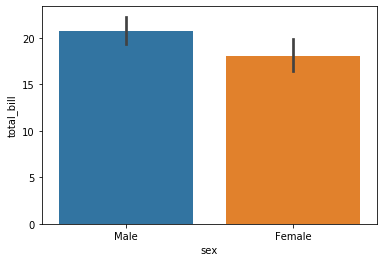

In [13]:
# linha no meio eh desvio padrao
sns.barplot(x='sex', y='total_bill', data=tips)

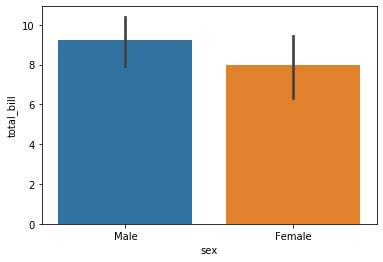

In [12]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

#### Count Plot

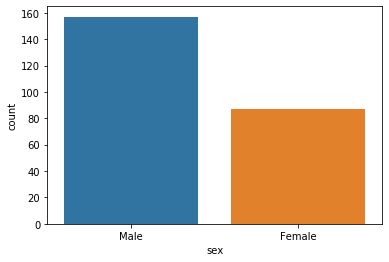

In [14]:
# conta os dados
sns.countplot(x='sex', data=tips)

#### Box Plot

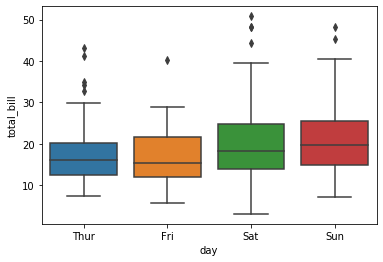

In [15]:
sns.boxplot(x='day', y='total_bill', data=tips)

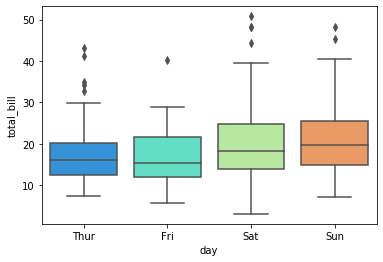

In [16]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow')

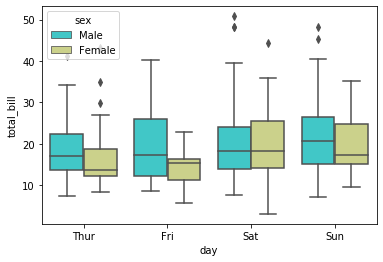

In [17]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow', hue='sex')

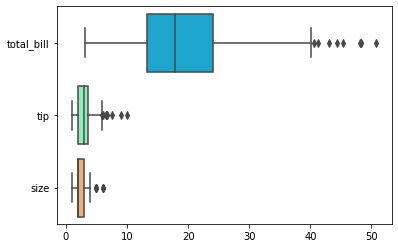

In [18]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

#### Violin Plot

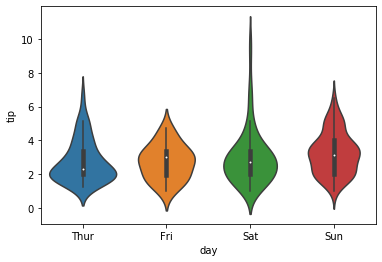

In [20]:
# distribui os dados com KDE
sns.violinplot(x='day', y='tip', data=tips)

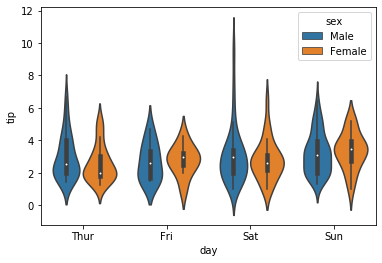

In [21]:
sns.violinplot(x='day', y='tip', data=tips, hue='sex')

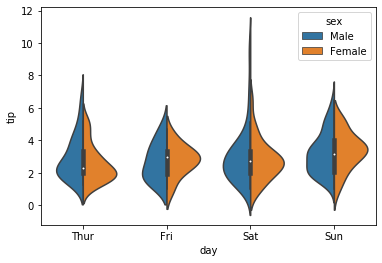

In [22]:
sns.violinplot(x='day', y='tip', data=tips, hue='sex', split=True)

#### Strip Plot

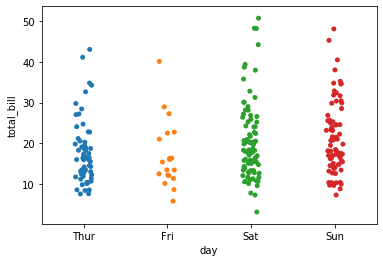

In [23]:
sns.stripplot(x='day', y='total_bill', data=tips)

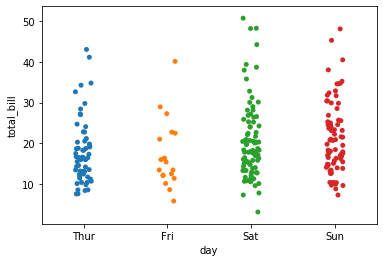

In [24]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

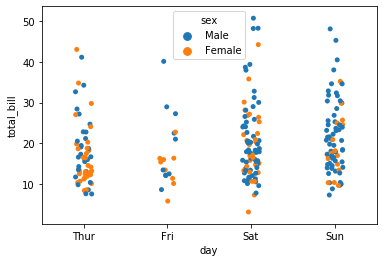

In [25]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

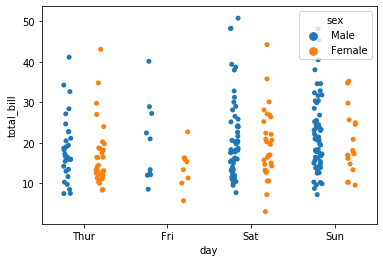

In [27]:
# dodge antigamente era split
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True)

#### Swarm Plot

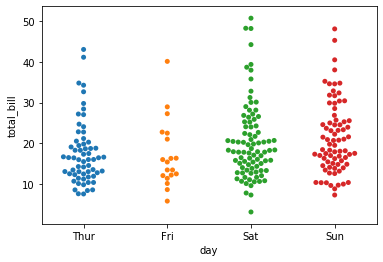

In [28]:
sns.swarmplot(x='day', y='total_bill', data=tips)

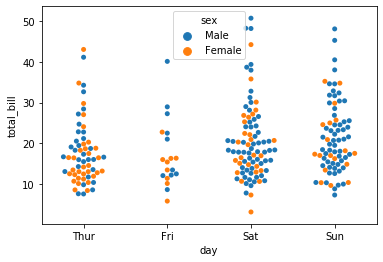

In [29]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

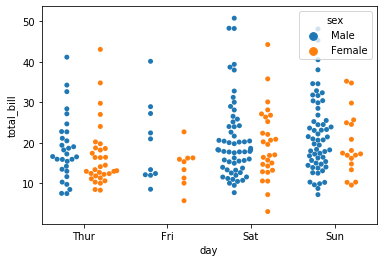

In [30]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True)

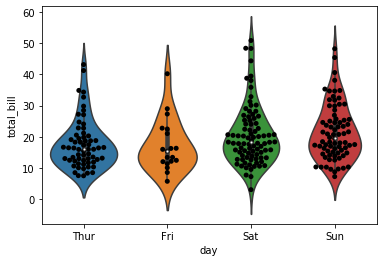

In [31]:
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')
sns.violinplot(x='day', y='total_bill', data=tips)

#### Cat Plot

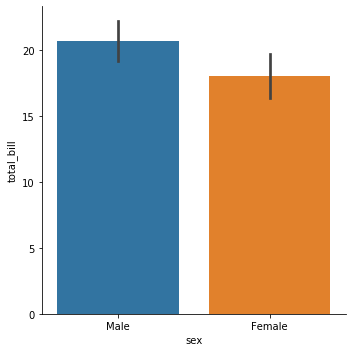

In [34]:
# antigo factor plot
# plota o tipo que tu especificar
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')

### Plots Matriciais

In [36]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [37]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Heat Map

In [39]:
# heat map precisa de matriz
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [40]:
crr = tips.corr()

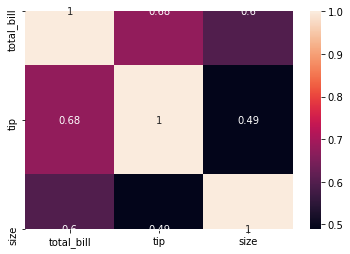

In [56]:
sns.heatmap(crr, annot=True)

In [48]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [49]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [50]:
pf = flights.pivot_table(values='passengers', index='month', columns='year')

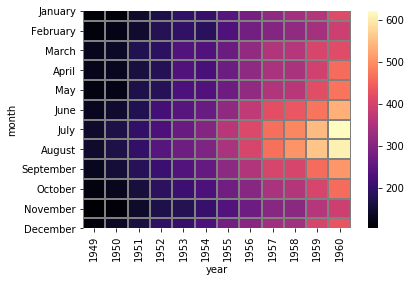

In [55]:
sns.heatmap(pf, cmap='magma', linecolor='gray', linewidth=1)

#### Cluster Map

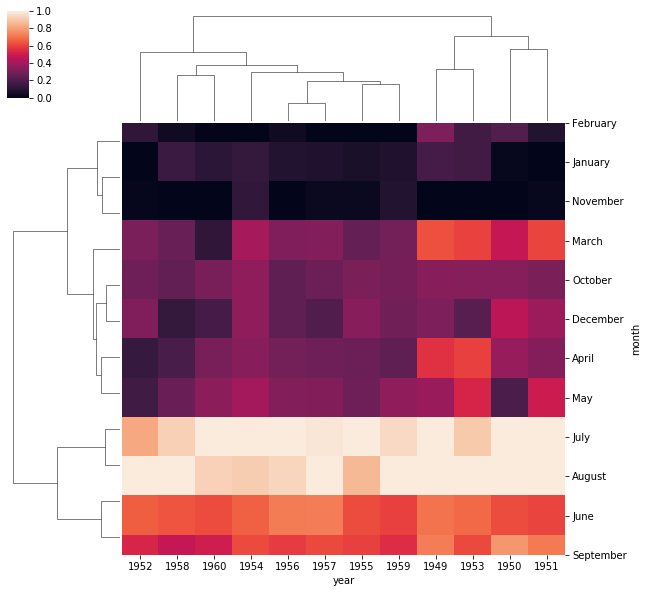

In [58]:
sns.clustermap(pf, standard_scale=1)

### Plots de Regressão

In [59]:
import seaborn as sns
%matplotlib inline

In [60]:
tips = sns.load_dataset('tips')

In [61]:
# regressao = modelos lineares de previsao
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


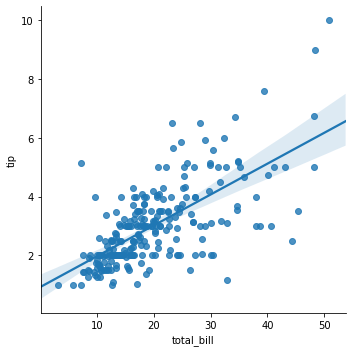

In [62]:
# lm = linear model
sns.lmplot(x='total_bill', y='tip', data=tips)

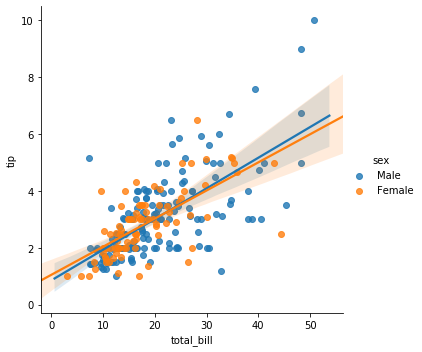

In [63]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

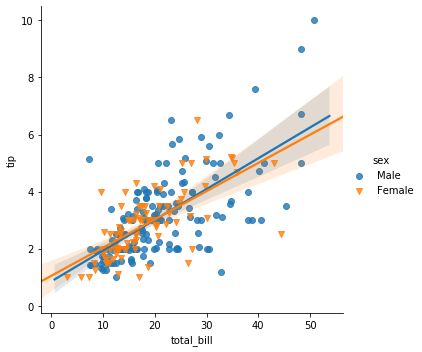

In [64]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

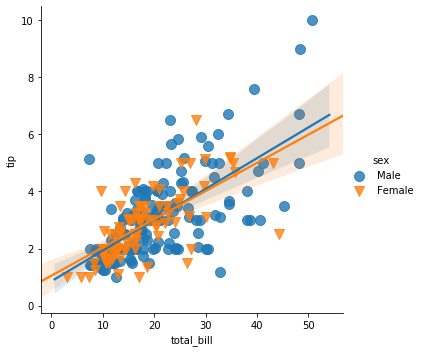

In [65]:
# alterar valores do scatter plot
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100})

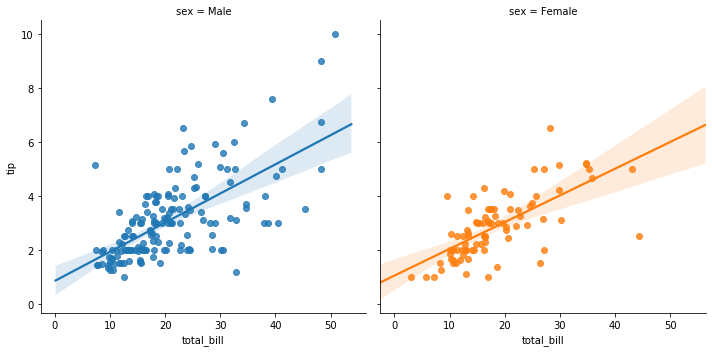

In [66]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='sex')

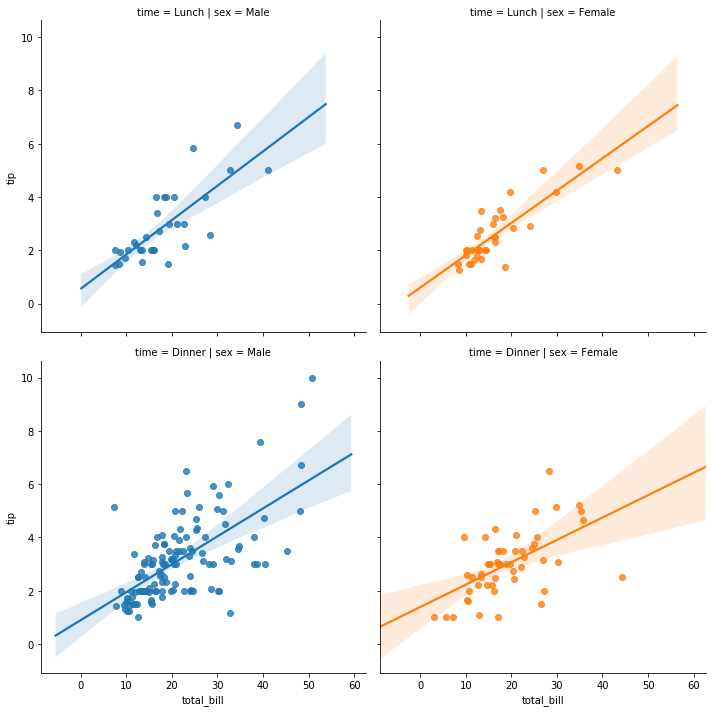

In [67]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='sex', row='time')

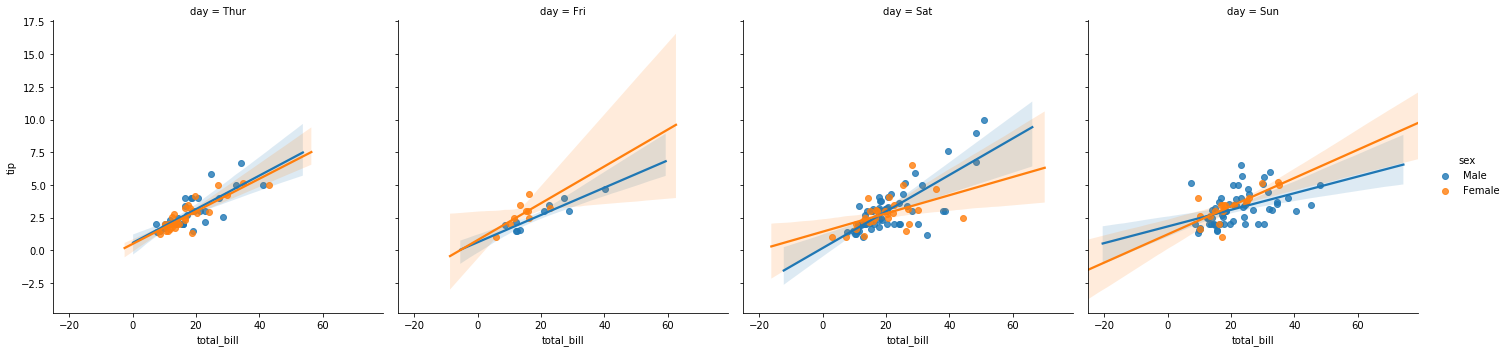

In [68]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day')

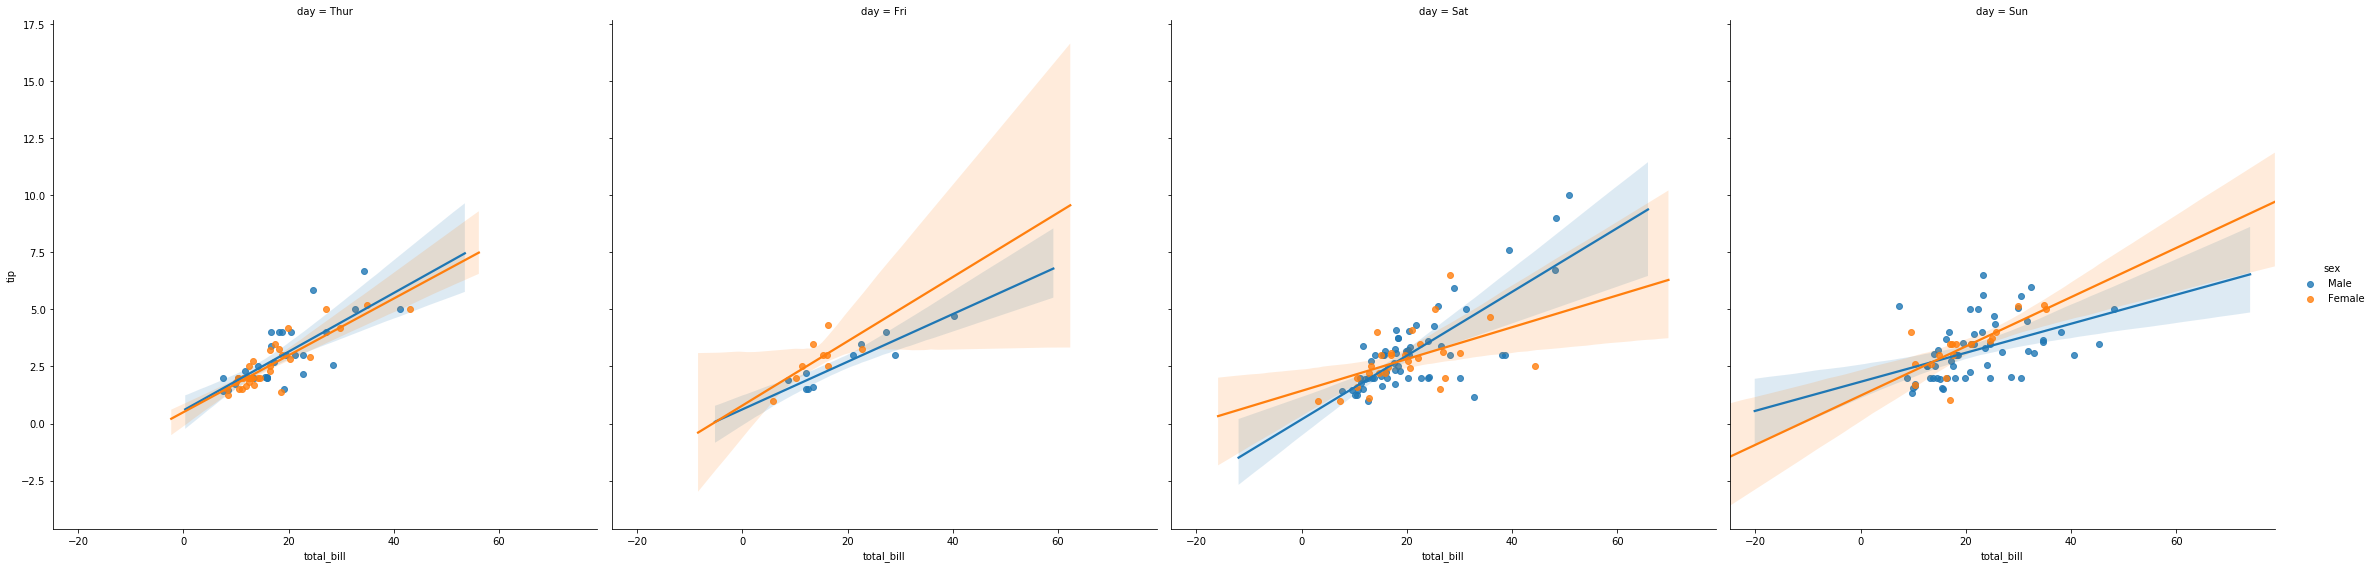

In [70]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day', height=8)

### Pair Grids

In [71]:
import matplotlib.pyplot as plt

In [72]:
iris = sns.load_dataset('iris')

In [73]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

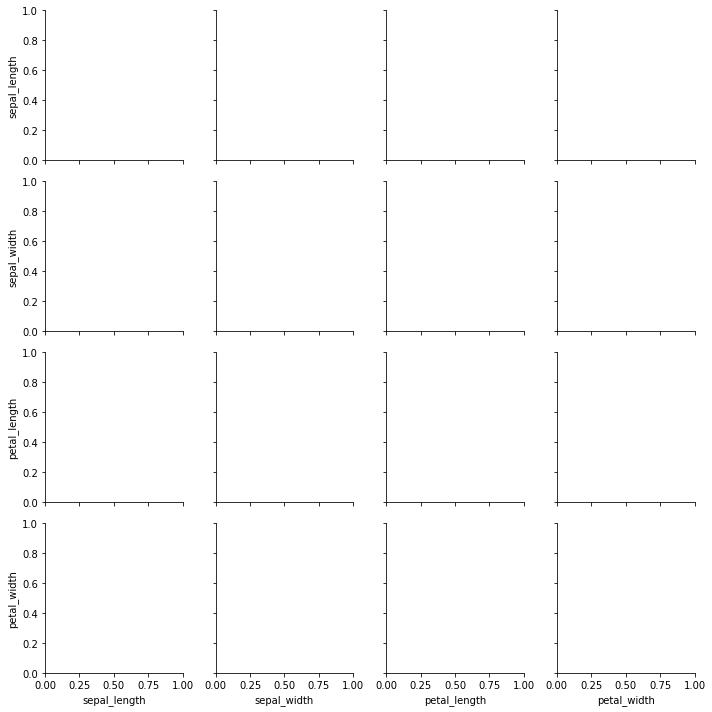

In [75]:
sns.PairGrid(iris)

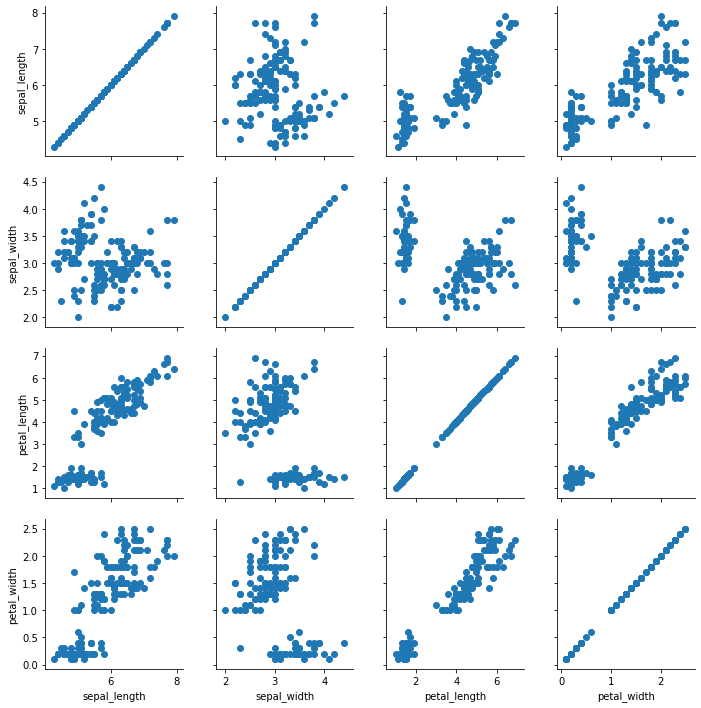

In [76]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

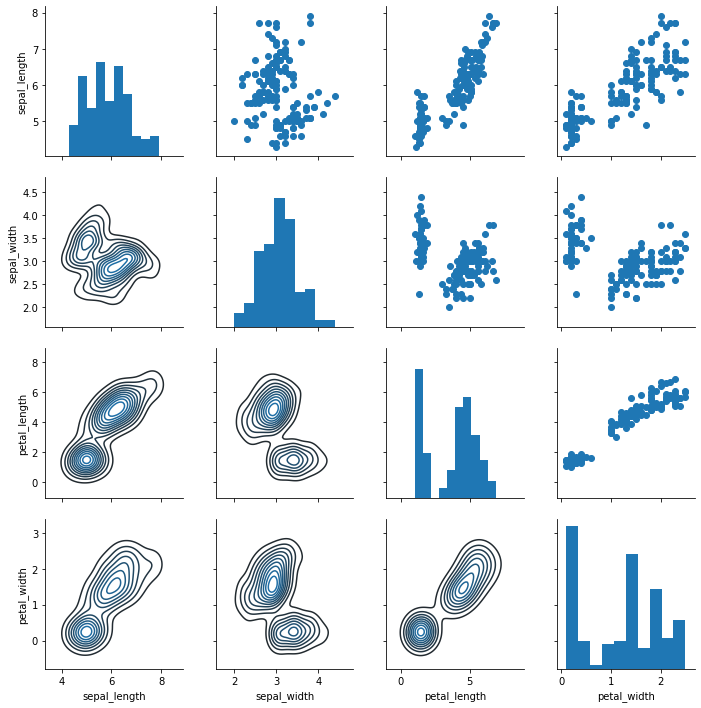

In [77]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

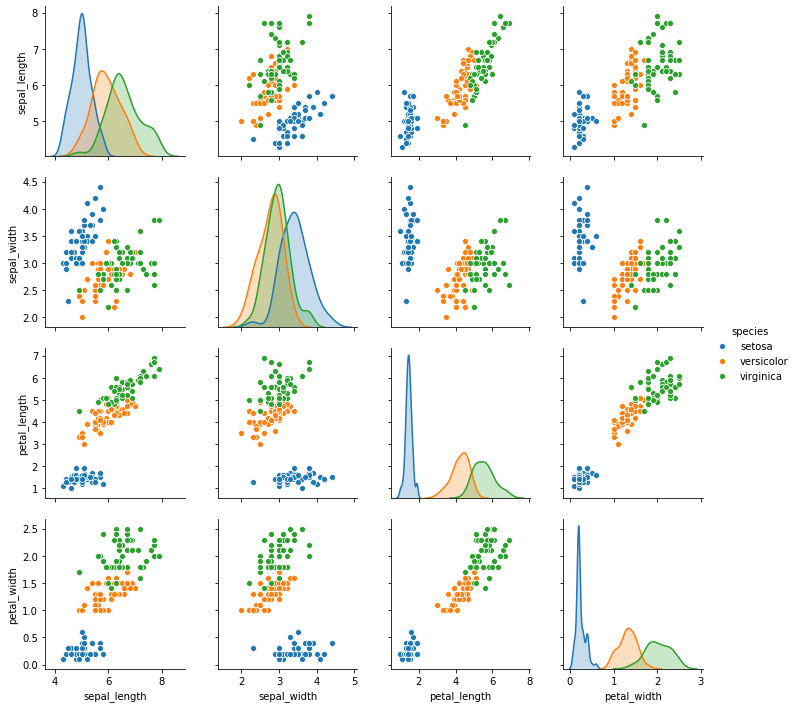

In [78]:
sns.pairplot(iris, hue='species')

In [79]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


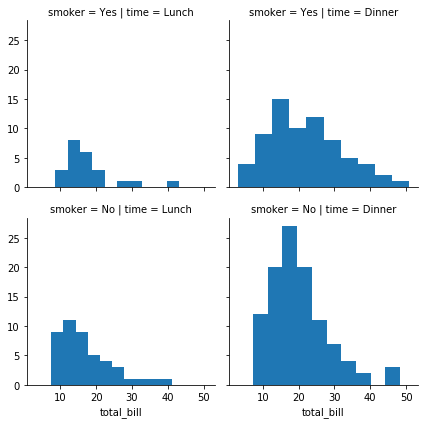

In [81]:
g = sns.FacetGrid(tips, col='time', row='smoker')
g.map(plt.hist, 'total_bill')

### Estilos e Cores

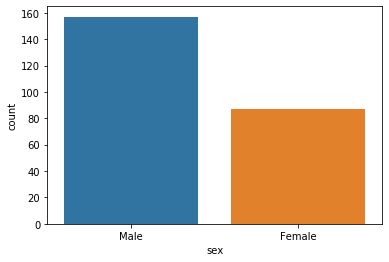

In [82]:
sns.countplot(x='sex', data=tips)

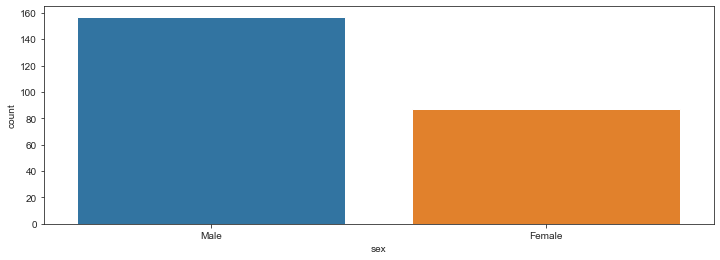

In [97]:
sns.set_style('ticks')
plt.figure(figsize=(12, 4))
sns.countplot(x='sex', data=tips)

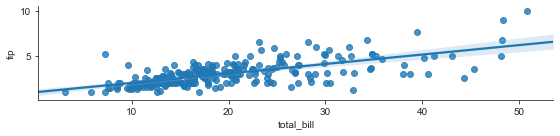

In [100]:
# alterando tamanho sem plt.figure
sns.lmplot(x='total_bill', y='tip', data=tips, size=2, aspect=4)

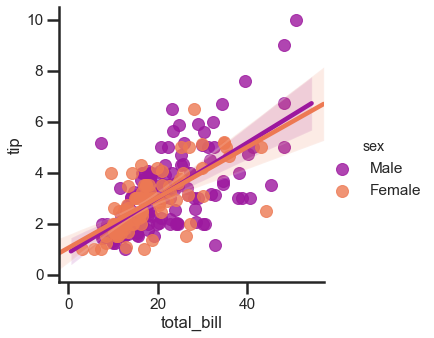

In [107]:
sns.set_context('poster', font_scale=0.7)
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='plasma')